In [ ]:
'''
Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.
'''

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
upload=files.upload()

Saving Airlines+Data.csv to Airlines+Data.csv


In [4]:
data=pd.read_csv("Airlines+Data.csv")

In [5]:
data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


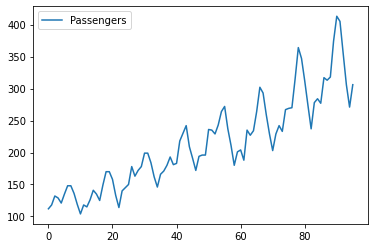

In [12]:
data.plot()

In [8]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [17]:
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


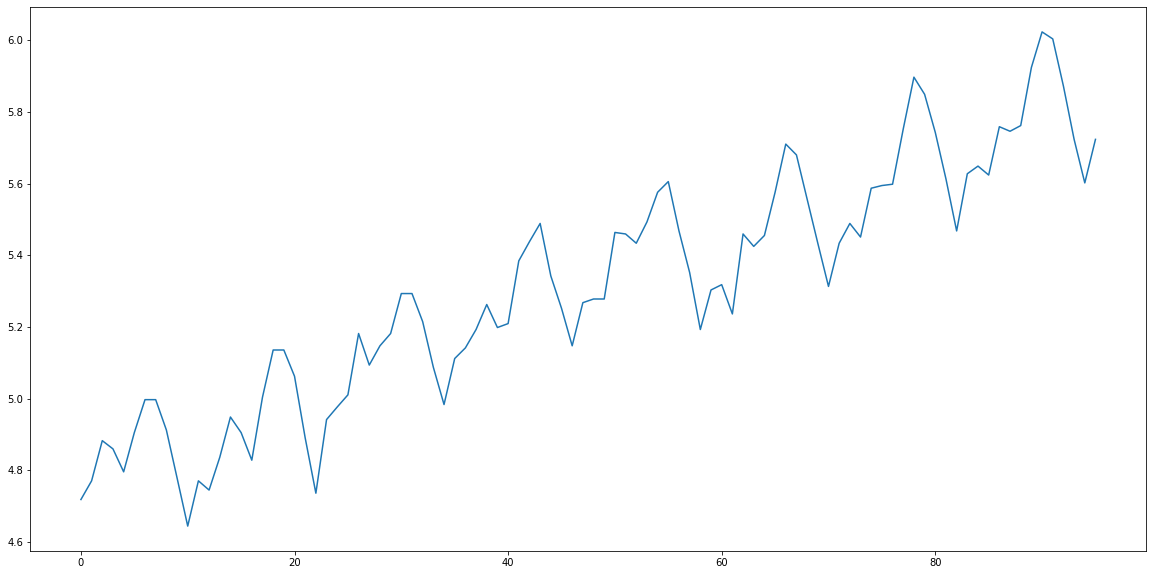

In [18]:
plt.figure(figsize=(20,10))
data_log=np.log(data['Passengers'])
plt.plot(data_log)

In [19]:
data_log=data_log.dropna()


In [20]:
data_log.head()

0    4.718499
1    4.770685
2    4.882802
3    4.859812
4    4.795791
Name: Passengers, dtype: float64

In [25]:
import numpy as np
from pandas.core.describe import DataFrameDescriber
data['t'] = np.arange(1,97)
data['t_squared'] = data['t']**2
data["Passengers_log"] =np.log(data['Passengers'])

In [26]:
data.head()

,Month,Passengers,t,t_squared,Passengers_log
0,Jan-95,112,1,1,4.718499
1,Feb-95,118,2,4,4.770685
2,Mar-95,132,3,9,4.882802
3,Apr-95,129,4,16,4.859812
4,May-95,121,5,25,4.795791


In [27]:
train = data.head(75)
test = data.tail(20)

In [28]:
#creating model
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

# Linear Model
linear_model =smf.ols("Passengers~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(linear_pred)))
linear_rmse

57.36910249531183

In [29]:
#Quadratic Model
quad_model =smf.ols("Passengers~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(quad_pred)))
quad_rmse


59.88289384985207

In [30]:
# Exponential model
exp_model  =smf.ols("Passengers~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Passengers']),np.array(exp_pred)))
exp_rmse

57.36910249531183

In [31]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,57.369102
1,rmse_exp,57.369102
2,rmse_quad,59.882894
